In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how= 'inner', left_on='sequel', 
                             right_on= 'id', right_index= True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
orig_seq.head()

In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values("diff",ascending = False).head())

In [ ]:
# Merge employees and top_cust a note on anti join
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
# Nice job! In this exercise, you replicated a semi join to filter the table of tracks by the table of invoice items to find 
# the top revenue non-musical tracks. With some additional data manipulation, you discovered that 
# 'TV-shows' is the non-musical genre that has the most top revenue-generating tracks. 
# Now that you've done both semi- and anti joins, it's time to move to the next topic.

tracks_invoices = non_mus_tcks.merge(top_invoices,on = 'tid',how = 'inner')
print(non_mus_tcks.head())
print()
print(tracks_invoices.head())

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]
print()
print(top_tracks)
# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})
print()
print(cnt_by_gid)

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres,on = 'gid',how = 'left'))

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

In [ ]:
# Concatenate the tables and add keys
print(inv_jul.head())
print()
print(inv_aug.head())
print()
print(inv_sep)
inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

In [ ]:
#The .concat() method is excellent when you need a lot of control over how concatenation is performed. 
#However, if you do not need as much control, 
#then the .append() method is another option. 
#You'll try this method out by appending the track lists together from different Metallica albums. 
#From there, you will merge it with the invoice_items table to determine which track sold the most.

In [ ]:
# Use the .append() method to combine the tracks tables
print(tracks_master.head())
print()
print(tracks_ride)
print()
print(tracks_st.head())
print()
print(invoice_items.head())

metallica_tracks = tracks_ride.append([tracks_master,tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items,on='tid',how='inner')
print(tracks_invoices.head())

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values('quantity',ascending = False))

In [ ]:
# Concatenate the classic tables vertically
print(classic_18.head())
print()
print(classic_19.head())
classic_18_19 = pd.concat([classic_18,classic_19],ignore_index=True,sort = True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18,pop_19],ignore_index=True,sort=True)

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19,on='tid',how='inner')
print(classic_pop)
print()
# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

In [ ]:
# Use merge_ordered() to merge gdp and sp500 on year and date
print(sp500.head())
print()
print(gdp.head())
gdp_sp500 = pd.merge_ordered(gdp,sp500, left_on='year', right_on='date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
print(gdp.head())
print(sp500.head())

gdp_sp500 = pd.merge_ordered(gdp,sp500,left_on = 'year',right_on='date',how='left',fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500)

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation,unemployment,on='date',how='inner')

# Print inflation_unemploy 
print(inflation_unemploy.head())

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate',y='cpi',kind='scatter')
plt.show()

In [ ]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp,pop,on=['date','country'] ,
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

In [ ]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp,pop,on=['country','date'],fill_method='ffill')

# Print date_ctry
print(date_ctry)

In [2]:
import pandas as pd
licenses = pd.read_pickle('https://assets.datacamp.com/production/repositories/5486/datasets/2a4d8e5d91f6f2b41477fa6ea81da91e4f09305e/licenses.p')


In [4]:
# licenses.head()

In [6]:
import pandas as pd
# jpm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=653764921&single=true&output=csv')

# jpm["date_time"] = pd.to_datetime(jpm["date_time"])

# wells = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=1331252858&single=true&output=csv')

# wells["date_time"] = pd.to_datetime(wells["date_time"])

# bac = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=1413472476&single=true&output=csv')

# bac["date_time"] = pd.to_datetime(bac["date_time"])

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp,recession,on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

In [3]:
# Merge gdp and pop on date and country with fill
import pandas as pd
gdp = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=1348453958&single=true&output=csv')
gdp.head()
gdp["date"] = pd.to_datetime(gdp["date"])
gdp.head()


# gdp_pop =pd.merge_ordered(gdp,pop,on = ['country','date'],fill_method='ffill')
# print(gdp_pop.head())
# print()
# print(gdp.head())
# print()
# print(pop.head())

# # Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
# gdp_pop['gdp_per_capital'] = gdp_pop['gdp']/gdp_pop['pop']
# gdp_pop.head()

# # Select dates equal to or greater than 1991-01-01
# recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# # Plot recent_gdp_pop
# recent_gdp_pop.plot(rot=90)
# plt.show()

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD


In [7]:
import pandas as pd
ur_wide = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=854767693&single=true&output=csv')
print(ur_wide.head()) # obtaining few rows from the data
print()
print(ur_wide.shape) # getting the data shape
print(ur_wide.columns)



   year  jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0  2010  9.8  9.8  9.9  9.9  9.6  9.4  9.4  9.5  9.5  9.4  9.8  9.3
1  2011  9.1  9.0  9.0  9.1  9.0  9.1  9.0  9.0  9.0  8.8  8.6  8.5
2  2012  8.3  8.3  8.2  8.2  8.2  8.2  8.2  8.1  7.8  7.8  7.7  7.9
3  2013  8.0  7.7  7.5  7.6  7.5  7.5  7.3  7.2  7.2  7.2  6.9  6.7
4  2014  6.6  6.7  6.7  6.2  6.3  6.1  6.2  6.1  5.9  5.7  5.8  5.6

(11, 13)
Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'],
      dtype='object')


In [9]:
# Unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')
print(ur_tall.head())
print(ur_tall.isnull().sum()) # getting the missing column

   year month  unempl_rate
0  2010   jan          9.8
1  2011   jan          9.1
2  2012   jan          8.3
3  2013   jan          8.0
4  2014   jan          6.6
year           0
month          0
unempl_rate    9
dtype: int64


In [13]:
ur_tall = ur_tall[ur_tall['unempl_rate'] != "nan"] # checking for column without missing value
print(ur_tall.head())
print(ur_tall.shape)
ur_tall = ur_tall.dropna()
print(ur_tall.head())
print(ur_tall.shape)
print(type(ur_tall)) # checking the data type


   year month unempl_rate
0  2010   jan         9.8
1  2011   jan         9.1
2  2012   jan         8.3
3  2013   jan         8.0
4  2014   jan         6.6
(123, 3)
   year month unempl_rate
0  2010   jan         9.8
1  2011   jan         9.1
2  2012   jan         8.3
3  2013   jan         8.0
4  2014   jan         6.6
(123, 3)
<class 'pandas.core.frame.DataFrame'>


In [18]:
 ur_tall = ur_tall.astype(str)
print(ur_tall.head())
print(type(ur_tall))

In [20]:
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])
print(ur_tall.head())

   year month unempl_rate       date
0  2010   jan         9.8 2010-01-01
1  2011   jan         9.1 2011-01-01
2  2012   jan         8.3 2012-01-01
3  2013   jan         8.0 2013-01-01
4  2014   jan         6.6 2014-01-01


In [21]:
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')
print(ur_sorted.head())

    year month unempl_rate       date
0   2010   jan         9.8 2010-01-01
11  2010   feb         9.8 2010-02-01
22  2010   mar         9.9 2010-03-01
33  2010   apr         9.9 2010-04-01
44  2010   may         9.6 2010-05-01


In [22]:
ur_sorted['unempl_rate'] = pd.to_numeric(ur_sorted['unempl_rate'])
print(ur_sorted.head())

    year month  unempl_rate       date
0   2010   jan          9.8 2010-01-01
11  2010   feb          9.8 2010-02-01
22  2010   mar          9.9 2010-03-01
33  2010   apr          9.9 2010-04-01
44  2010   may          9.6 2010-05-01


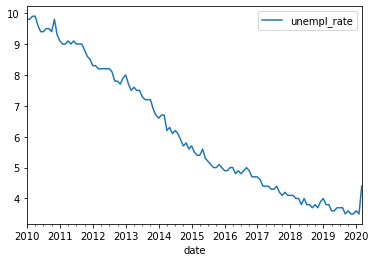

In [27]:
import matplotlib.pyplot as plt
# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()


In [28]:
ten_yr = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=1113683844&single=true&output=csv')
ten_yr.head()

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033,-0.060,0.025,-0.004,0.061,0.027,-0.059,-0.046,0.014,...,0.046,-0.103,0.191,0.107,0.024,-0.007,-0.047,-0.032,0.034,-0.051
1,high,-0.007,-0.041,0.022,0.031,0.080,-0.022,-0.060,-0.038,0.004,...,-0.004,0.041,0.187,0.068,-0.062,0.032,-0.090,0.012,-0.004,0.099
2,low,-0.016,-0.008,0.031,-0.002,0.059,-0.027,-0.052,-0.043,0.003,...,-0.062,0.069,0.168,0.123,-0.055,0.040,-0.036,-0.051,0.030,0.007
3,close,-0.057,0.022,-0.004,0.056,0.029,-0.052,-0.049,0.009,-0.023,...,-0.117,0.164,0.109,0.017,-0.006,-0.029,-0.028,0.026,-0.056,0.201


In [29]:
dji = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=648434883&single=true&output=csv')
dji.head()

,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026140
2,2007-04-01,0.048530
3,2007-05-01,0.052010
4,2007-06-01,-0.016070


In [30]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')
bond_perc.head()

,metric,date,close
0,open,2007-02-01,0.033
1,high,2007-02-01,-0.007
2,low,2007-02-01,-0.016
3,close,2007-02-01,-0.057
4,open,2007-03-01,-0.060


In [31]:
bond_perc = ten_yr.melt(id_vars='metric',var_name ='date',value_name='close')
bond_perc.head()


,metric,date,close
0,open,2007-02-01,0.033
1,high,2007-02-01,-0.007
2,low,2007-02-01,-0.016
3,close,2007-02-01,-0.057
4,open,2007-03-01,-0.060


In [34]:
bond_perc_close = bond_perc.query('metric == "close"')
bond_perc_close.head()


,metric,date,close
3,close,2007-02-01,-0.057
7,close,2007-03-01,0.022
11,close,2007-04-01,-0.004
15,close,2007-05-01,0.056
19,close,2007-06-01,0.029


In [35]:
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji,bond_perc_close,on = 'date',how='inner')
dow_bond.head()


,date,close_x,metric,close_y
0,2007-02-01,0.005094,close,-0.057
1,2007-03-01,-0.026140,close,0.022
2,2007-04-01,0.048530,close,-0.004
3,2007-05-01,0.052010,close,0.056
4,2007-06-01,-0.016070,close,0.029


In [36]:
dow_bond = pd.merge_ordered(dji,bond_perc_close,on = 'date',how='inner',suffixes = ('_dow','_bond'))
dow_bond.head()


,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.057
1,2007-03-01,-0.026140,close,0.022
2,2007-04-01,0.048530,close,-0.004
3,2007-05-01,0.052010,close,0.056
4,2007-06-01,-0.016070,close,0.029


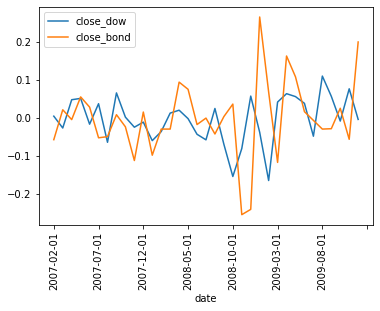

In [38]:
dow_bond.plot(y=['close_dow','close_bond'], x='date', rot=90)
plt.show()